In [51]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image

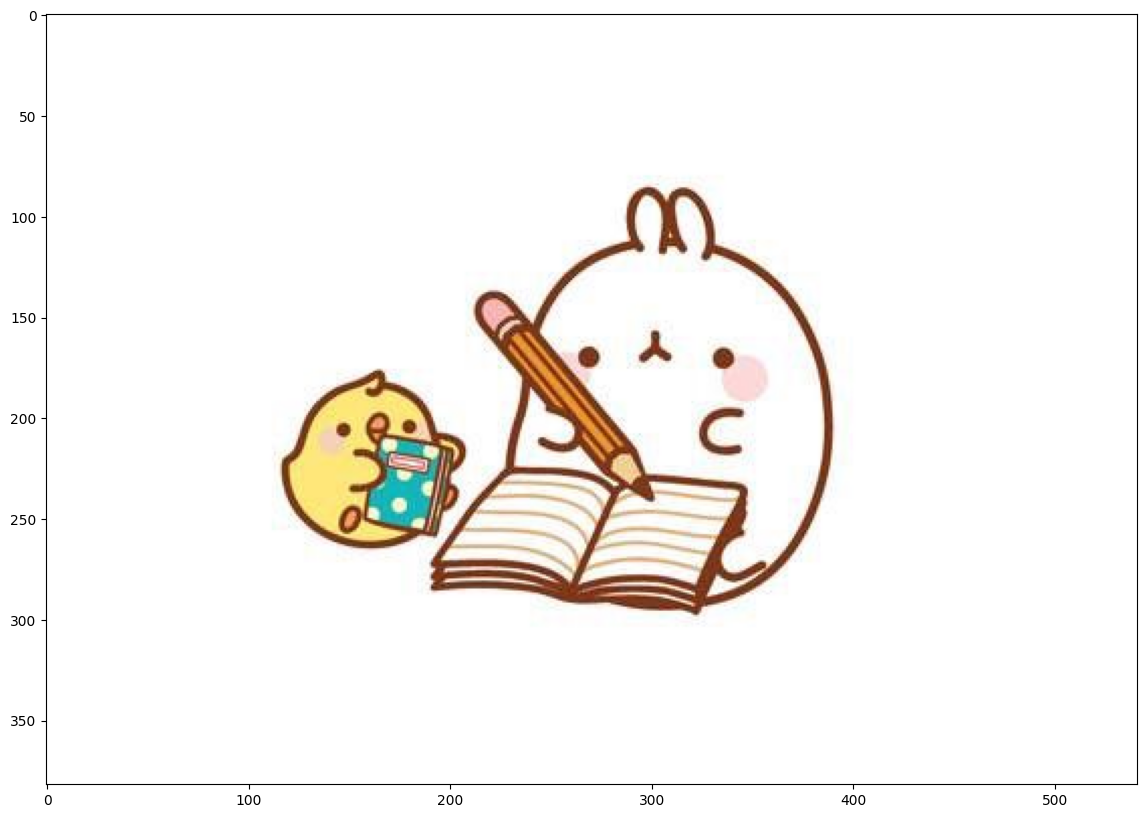

In [52]:
img_file = str(input("Nhập vào file ảnh: "))
img = Image.open(img_file)
plt.figure(figsize=(15, 10))
plt.imshow(np.array(img))

In [53]:
img_array = np.array(img)

In [54]:
def compare(before, after, title_1= "Before", title_2="After"):
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    plt.title(title_1)
    plt.imshow(before)
    plt.subplot(1, 2, 2)
    plt.title(title_2)
    plt.imshow(after)
    plt.show()

<b> Tăng độ sáng: </b>

In [55]:
def adjust_brightness(img, img_file):
    brightness = int(input("Nhập vào độ sáng muốn tăng: "))
    res = np.uint8(np.clip(img + np.array([brightness], dtype=np.int16), 0, 255))
    compare(img, res)

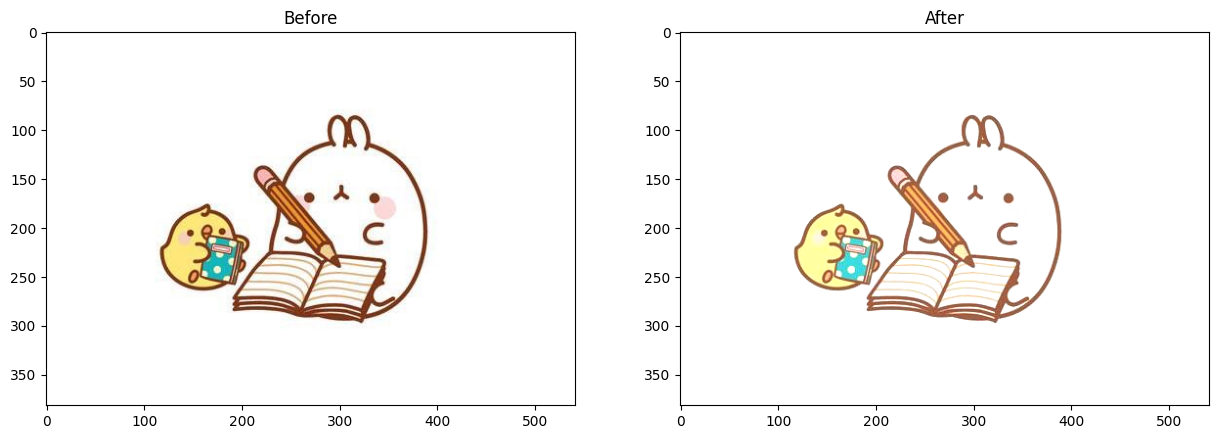

In [56]:
adjust_brightness(img_array, img_file)

<b> Tăng độ tương phản: </b>

In [57]:
def adjust_contrast(img, cons):
    cons = np.clip(float(cons), -255, 255)
    factor = (259 * (cons + 255)) / (255 * (259 - cons))
    return np.uint8(np.clip(factor * (img.astype(float) - 128) + 128, 0, 255))

def adjust_contrast_running(img, img_file):
    cons = int(input("Nhập vào độ tương phản muốn chỉnh sửa: "))
    res = np.array(adjust_contrast(img, cons))
    compare(img, res)

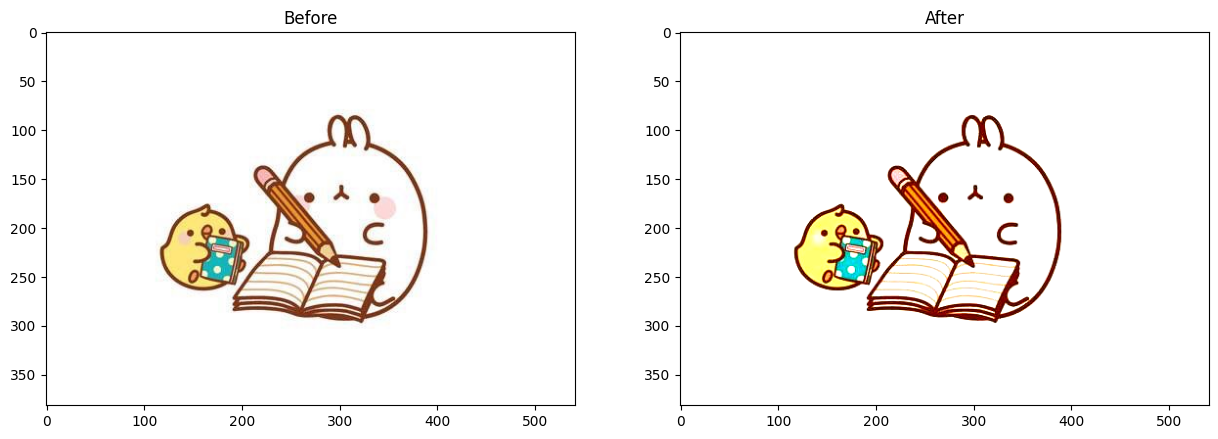

In [67]:
adjust_contrast_running(img_array, img_file)

<b> Lật ảnh: </b>

- Lật ảnh theo chiều ngang: 

In [59]:
def flip_image_horizontal(img):
    return [[img[i][-j-1] for j in range(len(img[0]))]
            for i in range(len(img))]

def flip_image_horizontal_running(img, img_file):
    res = np.array(flip_image_horizontal(img))
    compare(img, res)

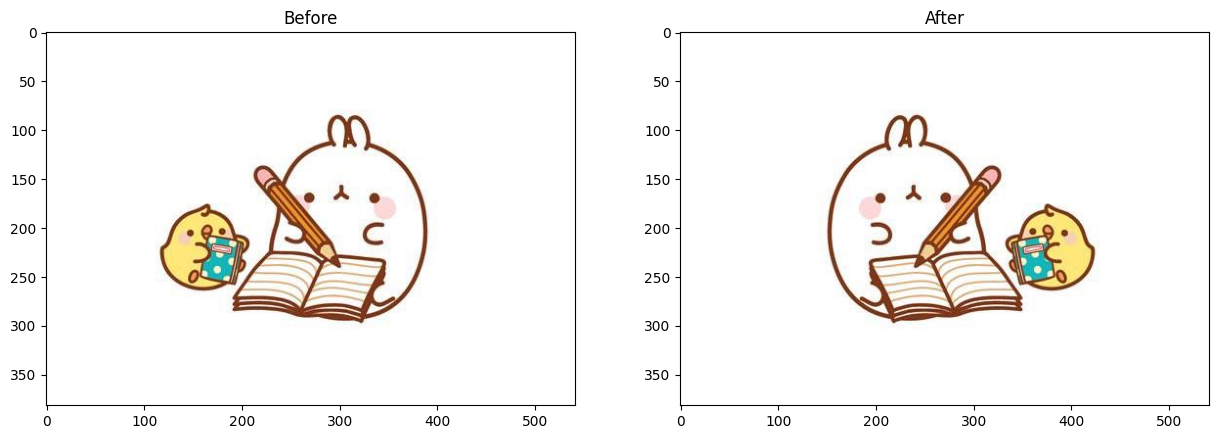

In [60]:
flip_image_horizontal_running(img_array, img_file)

- Lật ảnh theo chiều dọc: 

In [61]:
def flip_image_vertical(img):
    return [img[-i-1] for i in range(len(img))]

def flip_image_vertical_running(img, img_file):
    res = np.array(flip_image_vertical(img))
    compare(img, res)

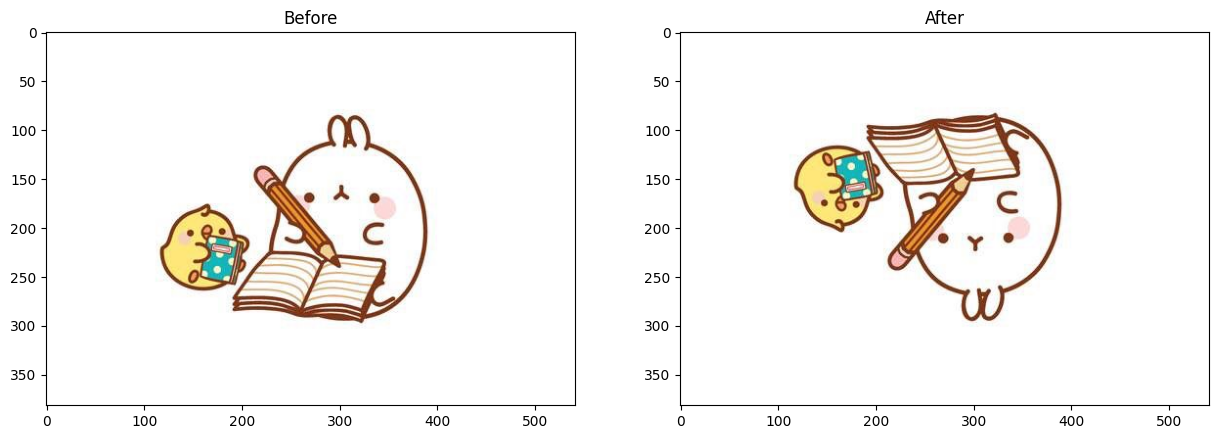

In [62]:
flip_image_vertical_running(img_array, img_file)

<b> Làm mờ ảnh </b>

In [63]:
def Gaussian_kernel(kernel_size, sigma):
    kernel_1d = np.linspace(-(kernel_size // 2), kernel_size // 2, num=kernel_size)
    kernel_1d = dnorm(kernel_1d, sigma)
    kernel_2d = np.outer(kernel_1d.T, kernel_1d.T)
    kernel_2d *= 1.0 / np.sum(kernel_2d)
    return kernel_2d

def dnorm(kernel_size, sigma):
    return np.array(1 / (np.sqrt(2 * np.pi) * sigma) * (np.exp(-np.power(kernel_size / sigma, 2) / 2)))

def Gaussian_blur_img(img, kernel_size):
    kernel = Gaussian_kernel(kernel_size, sigma=(kernel_size - 1) / 6)
    blur_img = np.zeros_like(img, dtype=np.float32)
    
    pad_img = np.pad(img, ((kernel_size // 2, kernel_size // 2), (kernel_size // 2, kernel_size // 2), (0,0)), mode='wrap')
    
    for c in range(img.shape[2]):
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                blur_img[i, j, c] = np.sum(pad_img[i:i + kernel_size, j:j + kernel_size, c] * kernel)
    
    return np.uint8(blur_img)    

def blur_img_running(img, img_file):
    blur_init = int(input("Nhập vào độ mờ muốn chỉnh sửa: "))
    res = Gaussian_blur_img(img, blur_init)
    compare(img, res)

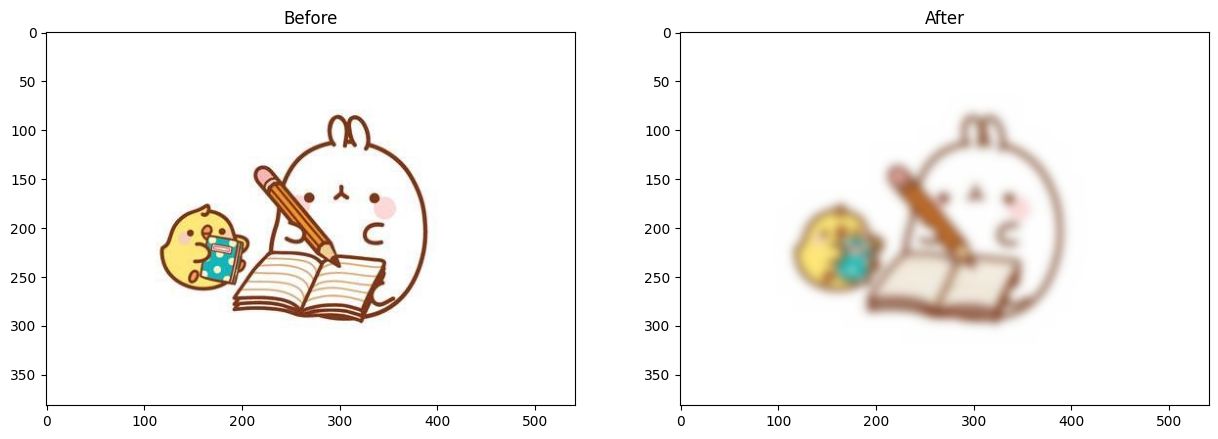

In [64]:
blur_img_running(img_array, img_file)

<b> Làm sắc nét ảnh: </b>

In [65]:
def sharp_img(img):
    kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
    gray_img = np.mean(img, axis=2)
        
    sharpened_image = np.zeros_like(gray_img)
    for i in range(1, gray_img.shape[0] - 1):
        for j in range(1, gray_img.shape[1] - 1):
            sharpened_image[i, j] = np.sum(gray_img[i-1:i+2, j-1:j+2] * kernel)
            
    
    sharpened_image = np.clip(sharpened_image, 0, 255).astype(np.uint8)
    
    sharpened_color_image = np.stack([sharpened_image] * 3, axis=-1)
    
    return sharpened_color_image

def sharp_img_running(img, img_file):
    res = sharp_img(img)
    compare(img, res)

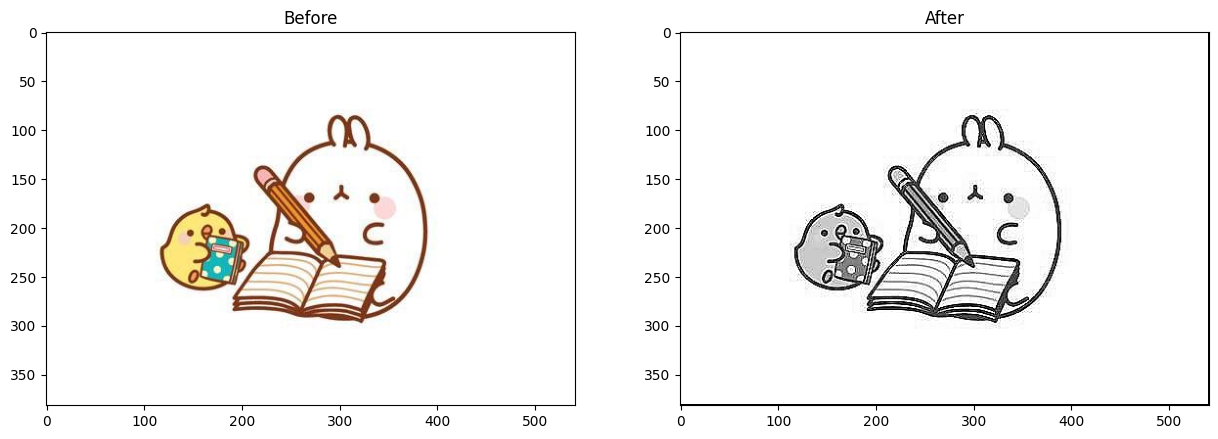

In [66]:
sharp_img_running(img_array, img_file)